<a href="https://colab.research.google.com/github/CaptainJimbo/MyPortfolio/blob/main/DigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td align="left">
  <a target="_blank" href="https://dimitriskogias.wixsite.com/spacecowboy" style="text-decoration: none; display: flex; align-items: center; color: white; background-color: purple; padding: 10px; border-radius: 5px;">
      <img src="https://static.wikia.nocookie.net/bravestarr/images/6/6d/Lucas_Conway.png/revision/latest?cb=20211111224054" width="40px" height="40px" style="border-radius: 50%; margin-right: 10px;" />
      <span>Visit my Webpage</span>
    </a>
  </td>
</table>




<table align="left">
  <td align="left"><a target="_blank" href="https://github.com/CaptainJimbo/MyPortfolio/blob/main/DigitClassification.ipynb" style="text-decoration: none; display: flex; align-items: center; color: black; background-color: lightgray; padding: 10px; border-radius: 5px;">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  width="40px" height="40px" style="border-radius: 50%; margin-right: 10px;"   />View it on GitHub</a></td>
</table>


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

#assert len(tf.config.list_physical_devices('GPU')) > 0

In [2]:
mnist = tf.keras.datasets.mnist
# This is a tuple of two tuples with arrays
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# These commands are to make the inputs suitable for neural network models
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_labels = (test_labels).astype(np.int64)

# Or I can use array = array.reshape(-1, 28, 28, 1) / 255.0).astype(np.float32)

11490434/11490434 [==============================] - 0s 0us/step


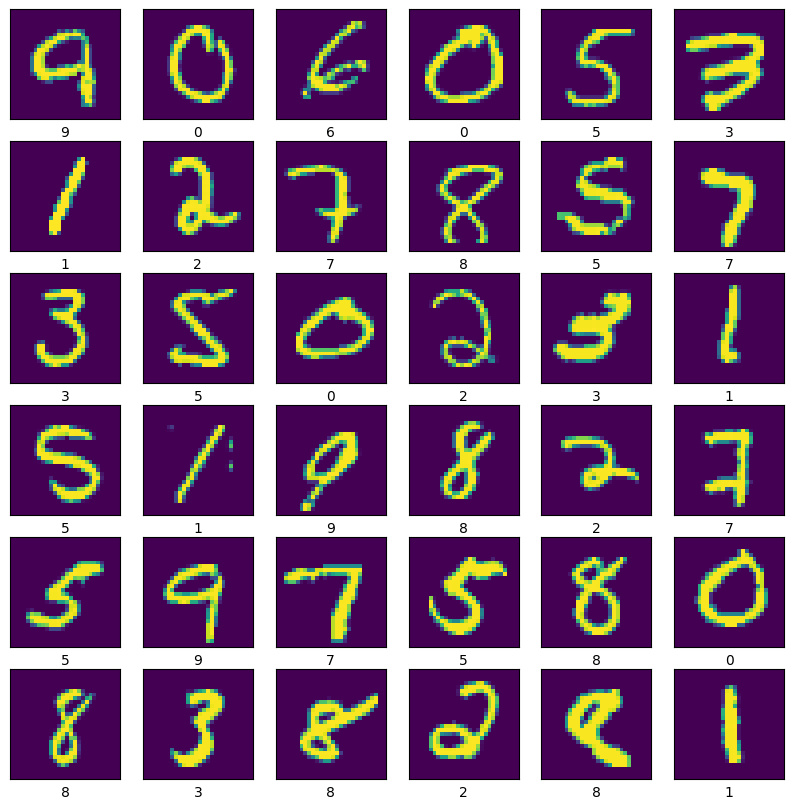

In [3]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    # The command np.squeeze makes the array a 1-dimensional input suitable for plt.imshow()
    plt.imshow(np.squeeze(train_images[image_ind]))#, cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [4]:
def fully_connected_model():
  fc_model = tf.keras.Sequential([
      # I flatten the input so that it can be fed into the model
      tf.keras.layers.Flatten(),

      # Activation function for the first fully connected (Dense) layer
      tf.keras.layers.Dense(128, activation= 'sigmoid'),

      # Second Dense layer that outputs the probability distribution across the 10 classes (0 to 9)
      tf.keras.layers.Dense(10, activation= 'softmax')

  ])
  return fc_model

model = fully_connected_model()

In [5]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.7133 - accuracy: 0.8256
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.3546 - accuracy: 0.9005
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3087 - accuracy: 0.9116
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2827 - accuracy: 0.9184
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2627 - accuracy: 0.9245


In [7]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.2484 - accuracy: 0.9275
Test accuracy: 0.9275000095367432


In [8]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu ),

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu ),

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # The last Dense layer to output the classification probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    return cnn_model

cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

1/1 [==============================] - 0s 208ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 

In [9]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), # Hanging indent style
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])

# I train the CNN model, with the same batch_size and number of epochs previously used
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 28s 29ms/step - loss: 0.1780 - accuracy: 0.9459
Epoch 2/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0512 - accuracy: 0.9844
Epoch 3/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0364 - accuracy: 0.9886
Epoch 4/5
938/938 [==============================] - 27s 28ms/step - loss: 0.0260 - accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0204 - accuracy: 0.9932


In [10]:
# I test the models accuracy with test data
test_loss, test_acc = cnn_model.evaluate(test_images,test_labels)

print('Test accuracy:', test_acc)
print('Much better that a standard fully connected layer')

313/313 [==============================] - 2s 6ms/step - loss: 0.0348 - accuracy: 0.9882
Test accuracy: 0.9882000088691711
Much better that a standard fully connected layer


In [11]:
predictions = cnn_model.predict(test_images)
predictions[0]

313/313 [==============================] - 2s 6ms/step


array([6.9817668e-10, 1.8772945e-09, 1.7674277e-07, 7.0096078e-08,
       1.1901353e-09, 6.4907518e-10, 7.1327035e-15, 9.9999923e-01,
       4.2851713e-07, 3.2523925e-08], dtype=float32)

In [12]:
prediction = np.argmax(predictions[0])
print(prediction)

7


Label of this digit is: 7


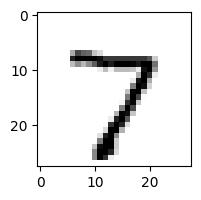

In [13]:
print("Label of this digit is:", test_labels[0])
plt.figure(figsize=(2,2))
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)
plt.show()